In [0]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 


In [0]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
classes = ['Ноль','Один', 'Два', 'Три', 'Четыре', 'Пять', 'Шесть', 'Семъ', 'Восемъ','Девять']

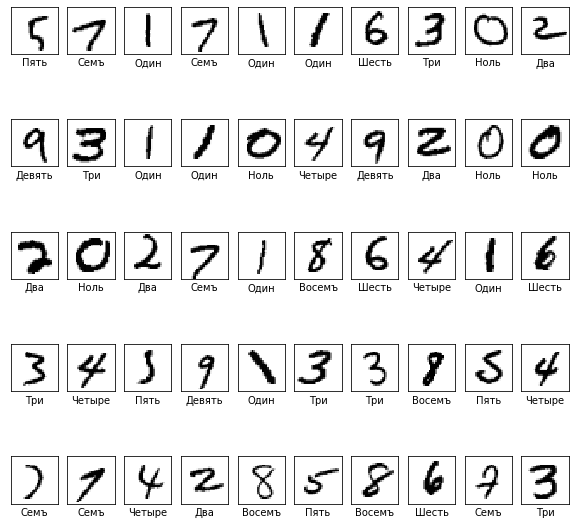

In [0]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255

In [0]:
n = 0

In [0]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
y_train = utils.to_categorical(y_train, 10)

In [0]:
y_test = utils.to_categorical(y_test, 10)

In [0]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 74us/sample - loss: 1.4039 - acc: 0.6980 - val_loss: 0.8523 - val_acc: 0.8481
Epoch 2/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.7175 - acc: 0.8489 - val_loss: 0.5688 - val_acc: 0.8755
Epoch 3/10
48000/48000 [==============================] - 4s 73us/sample - loss: 0.5455 - acc: 0.8710 - val_loss: 0.4677 - val_acc: 0.8889
Epoch 4/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4695 - acc: 0.8834 - val_loss: 0.4158 - val_acc: 0.8969
Epoch 5/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4255 - acc: 0.8903 - val_loss: 0.3830 - val_acc: 0.9012
Epoch 6/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3961 - acc: 0.8957 - val_loss: 0.3605 - val_acc: 0.9057
Epoch 7/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3745 - acc: 0.8994 - val_loss: 0.

In [0]:
model.save('Model_Numbers.h5')

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3105 - acc: 0.9152


In [0]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 91.52


___________________________________________________________________

In [0]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [0]:
model = load_model('Model_Numbers.h5')

In [0]:
classes = ['Ноль','Один', 'Два', 'Три', 'Четыре', 'Пять', 'Шесть', 'Семъ', 'Восемъ','Девять']

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
f = files.upload()

Saving 1.jpg to 1.jpg


In [1]:
!ls

sample_data


In [0]:
img_path = '8.jpg'

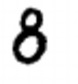

In [0]:
Image(img_path, width=150, height=150)

In [0]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

In [0]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [0]:
prediction = model.predict(x)

In [0]:
prediction

array([[0.00104912, 0.08783341, 0.02159263, 0.00094683, 0.00582335,
        0.29515615, 0.07142594, 0.00302197, 0.49666944, 0.01648111]],
      dtype=float32)

In [0]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: Восемъ
